In [5]:
import numpy as np

from Detector_Classes.M3RefTracking import M3RefTracking
from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

from det_classes_test import plot_ray_hits_2d
from detector_characterization import filter_ray_xy

In [2]:
base_dir = 'F:/Saclay/cosmic_data/'
det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
out_dir = 'F:/Saclay/Analysis/Cosmic Bench/9-24-24/'
run_name = 'sg1_stats_7-26-24'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'max_hv_long_1'

det_single = 'strip_grid_1'

file_nums = list(range(0, 100))

chunk_size = 100  # Number of files to process at once

realign_dream = True  # If False, read alignment from file, if True, realign Dream detector

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
m3_dir = f'{run_dir}{sub_run_name}/m3_tracking_root/'

In [3]:
print(f'Getting ray data...')
ray_data = M3RefTracking(m3_dir, single_track=True, file_nums=file_nums)

Getting ray data...


100%|██████████| 712/712 [00:09<00:00, 72.96it/s]


In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [6]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')
det.load_dream_data(data_dir, ped_dir, 10, file_nums, chunk_size, save_waveforms=True)
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 3
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 800, 'resist_2': 460}
Ped files found: ['CosTb_max_hv_long_1_pedthr_240726_14H35_000_03_decoded_array.root', 'CosTb_max_hv_long_1_pedthr_240726_14H45_000_03_decoded_array.root']
Pedestal data shape: (1033, 256, 32)
Pedestal fits: (256,)
Reading in data...


100%|██████████| 100/100 [00:28<00:00,  3.50it/s]


Read in data shape: (210170, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:03<00:00,  4.24it/s]


Fitting time: 4.5873754024505615 s
Processed chunk 1/1
Getting hits...
Hits shape: (210170, 256)


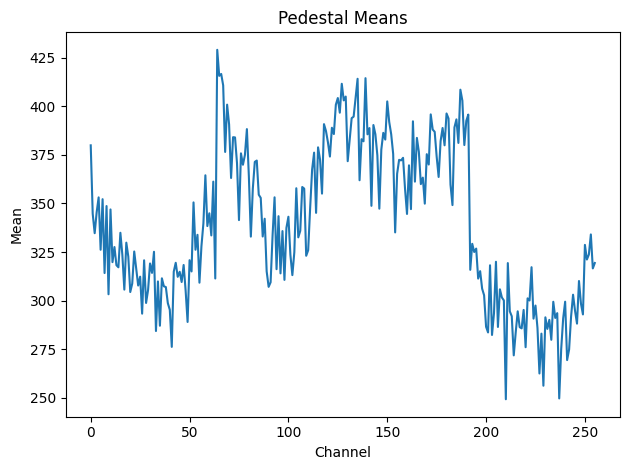

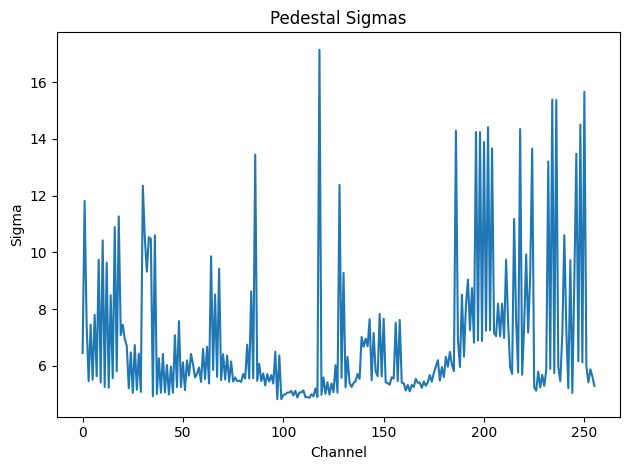

In [10]:
det.dream_data.plot_pedestals()

C:\Users\Dylan\PycharmProjects\saclay_micromegas\DreamData.py:431: RuntimeWarning: invalid value encountered in divide
  max_amp_div_sum = event_max_amps / event_amp_sums


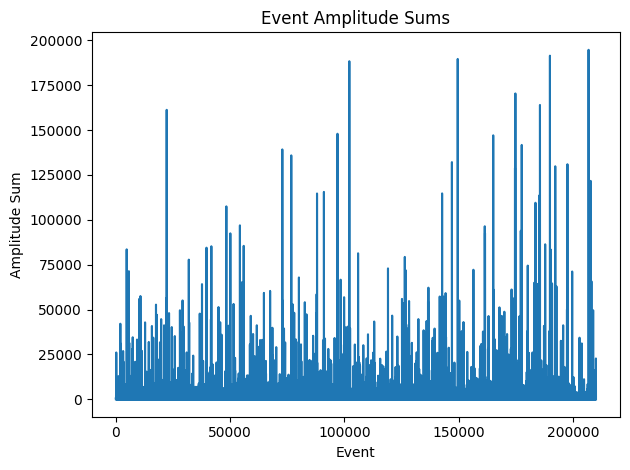

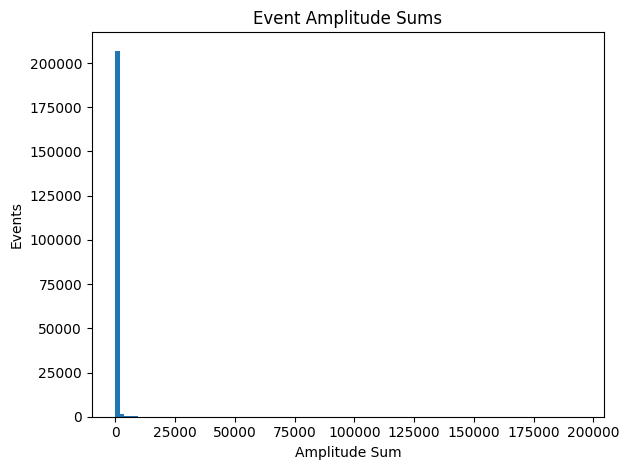

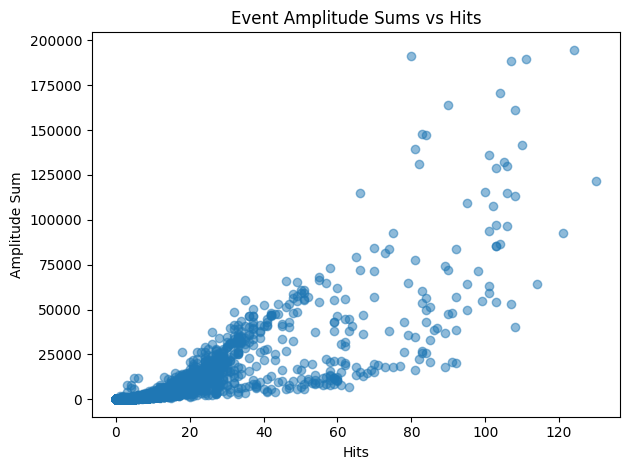

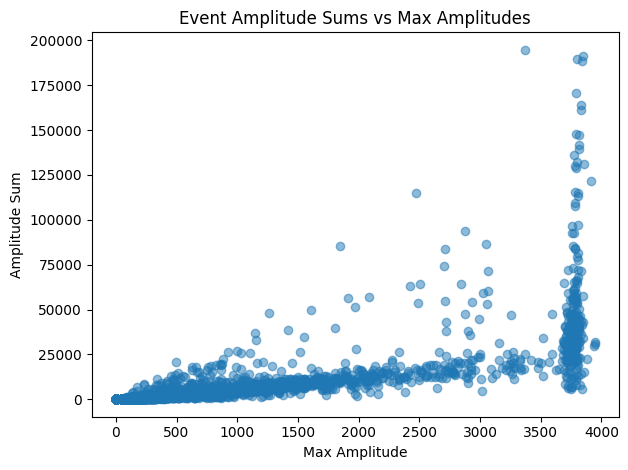

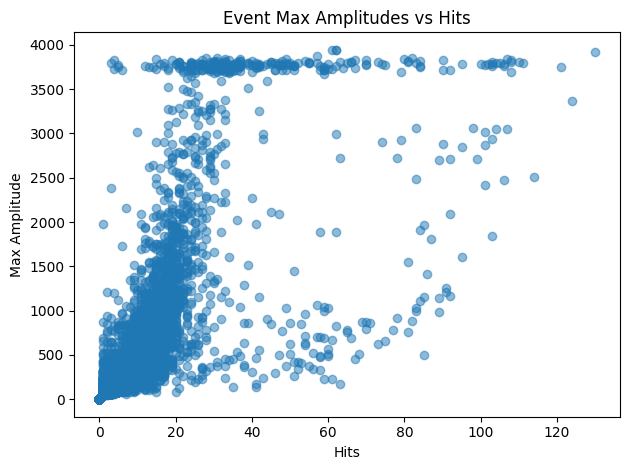

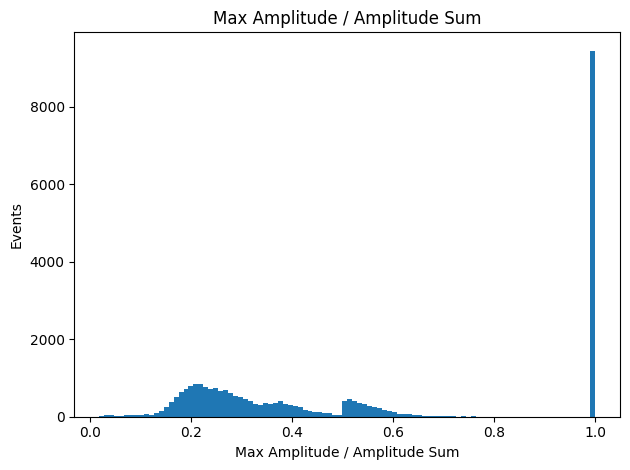

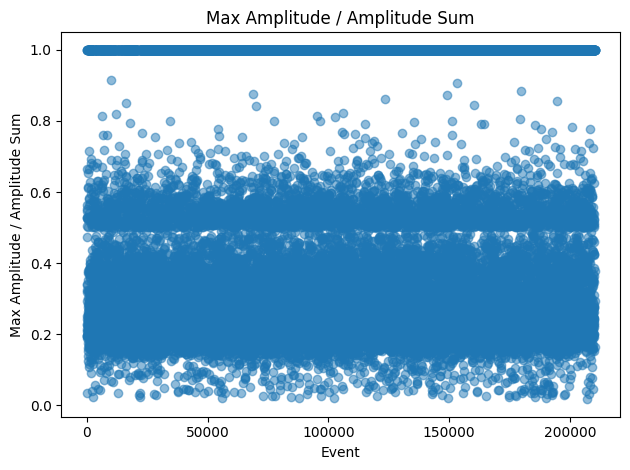

In [7]:
det.dream_data.plot_noise_metric()

In [8]:
in_range = False  # If True, filter hits in range, if False, filter hits out of range
# x_ray_bounds, y_ray_bounds = [-30, 30], [-30, 30]
x_ray_bounds, y_ray_bounds = [-62, 42], [-40, 45]
ray_events = filter_ray_xy(ray_data, det.center[2], x_ray_bounds, y_ray_bounds)
if in_range:
    dream_data_indices = np.where(np.isin(det.dream_data.event_nums, ray_events))[0]
else:
    dream_data_indices = np.where(~np.isin(det.dream_data.event_nums, ray_events))[0]

# max_amp_thresh = [3500, 4000]
max_amp_thresh = [0, 4000]
max_amps = np.max(det.dream_data.data_amps, axis=1)
max_amp_indices = np.where((max_amps > max_amp_thresh[0]) & (max_amps < max_amp_thresh[1]))[0]
dream_data_indices = np.intersect1d(dream_data_indices, max_amp_indices)

det.dream_data.filter_data(dream_data_indices)

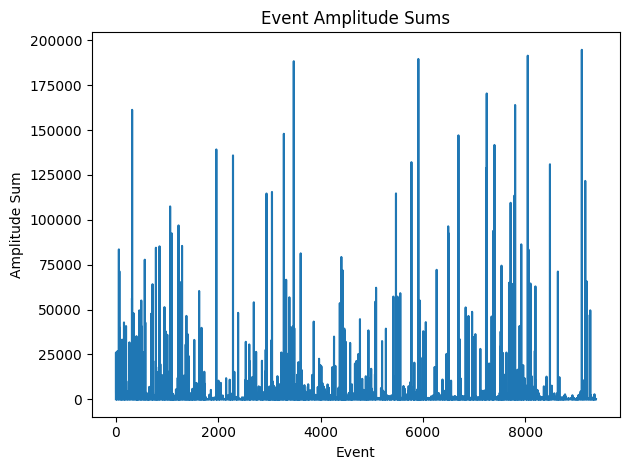

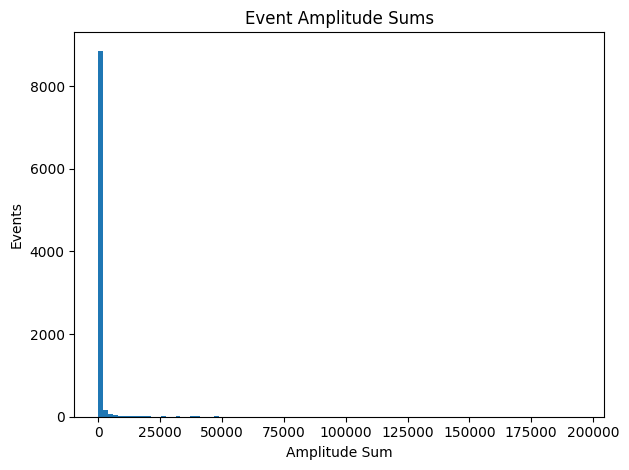

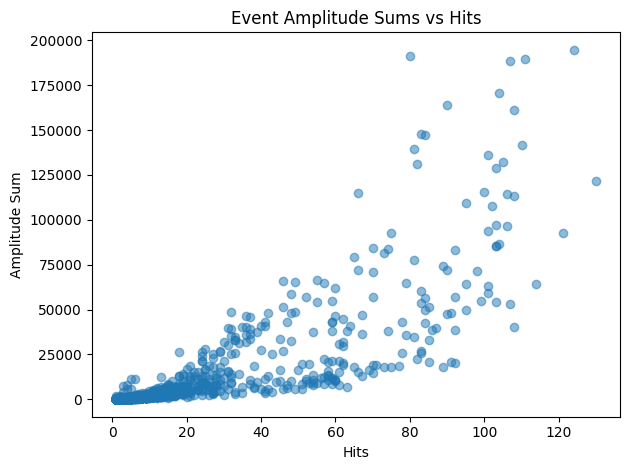

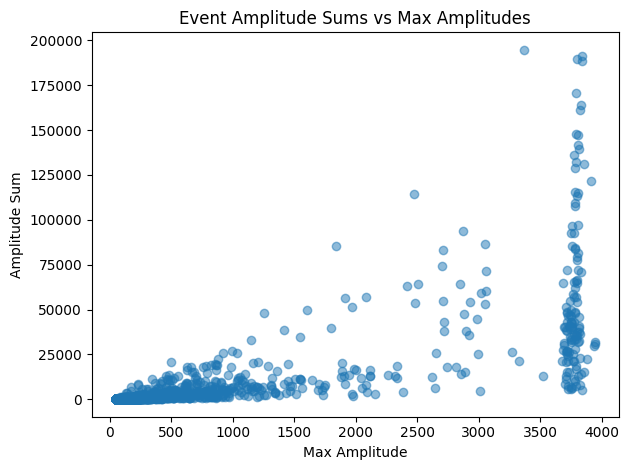

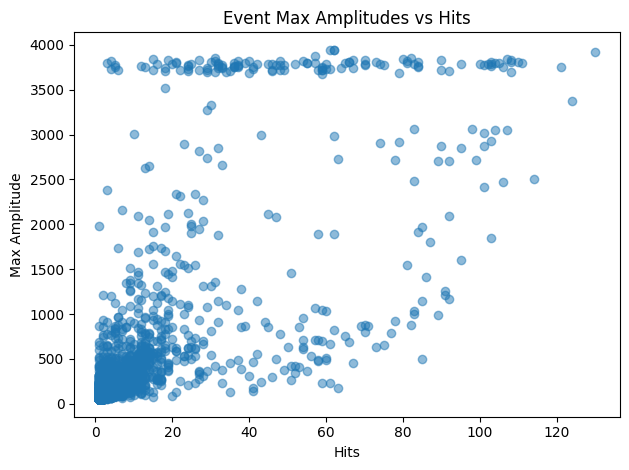

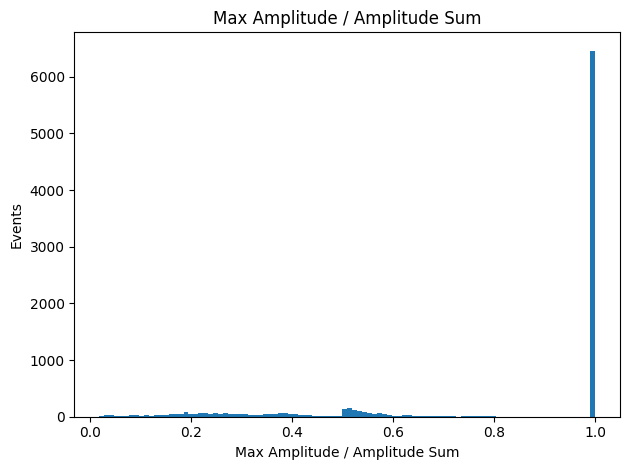

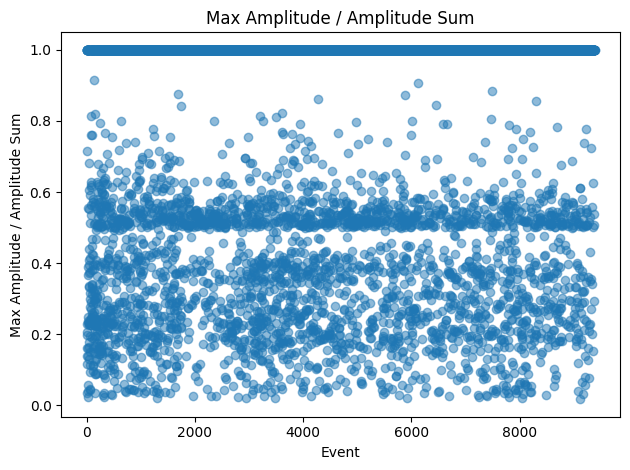

In [9]:
det.dream_data.plot_noise_metric()

Connector 1 Dead Strips: [ 1  4  6  7  8 10 12 14 15 16 18 19 20 22 30 31 32 33 34 36]
Connector 2 Dead Strips: [ 86  96  97  98  99 100 101 103 104 105 107 108 109 110 111 112 113 114
 115 117 118]
Connector 3 Dead Strips: [128 134 135 136 137 138 139 140 141 142 143 144 145 146 148 150 186]
Connector 4 Dead Strips: [198 200 202 204 213 214 217 218 219 224 225 226 227 231 232 233 234 236
 237 240 246 248 250 251 253]


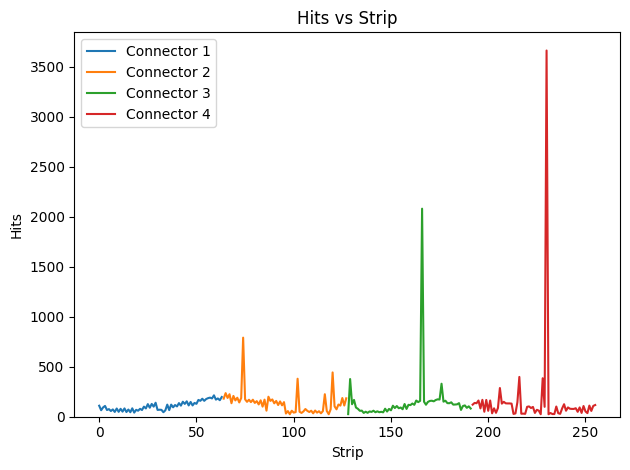

In [11]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

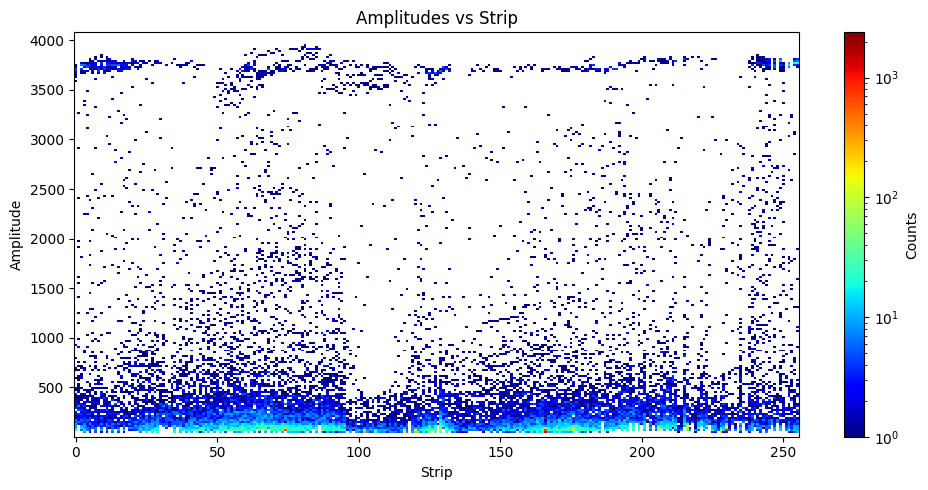

In [12]:
det.dream_data.plot_amplitudes_vs_strip()

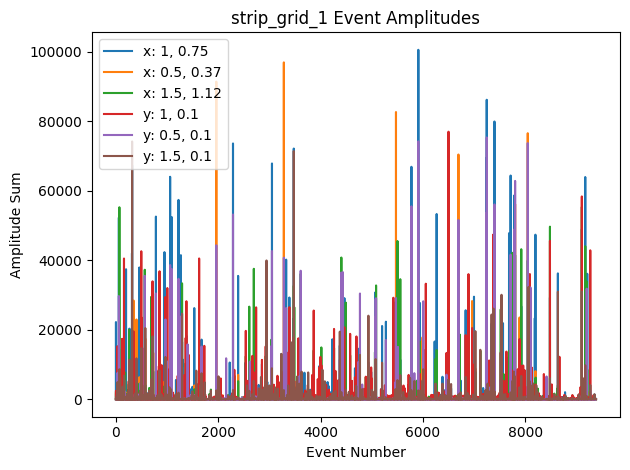

In [13]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

if realign_dream:
    det.add_rotation(90, 'z')

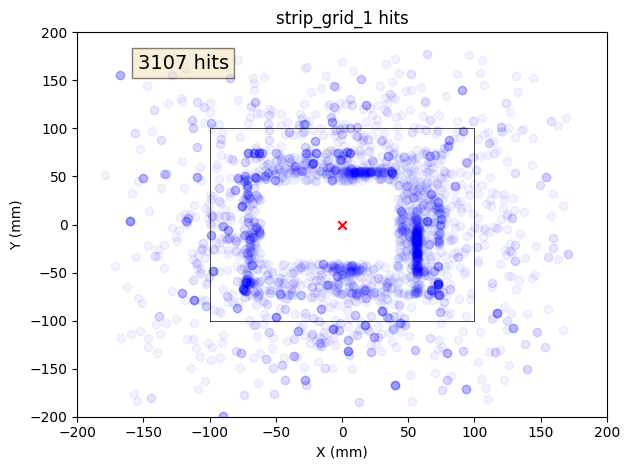

In [14]:
plot_ray_hits_2d(det, ray_data)

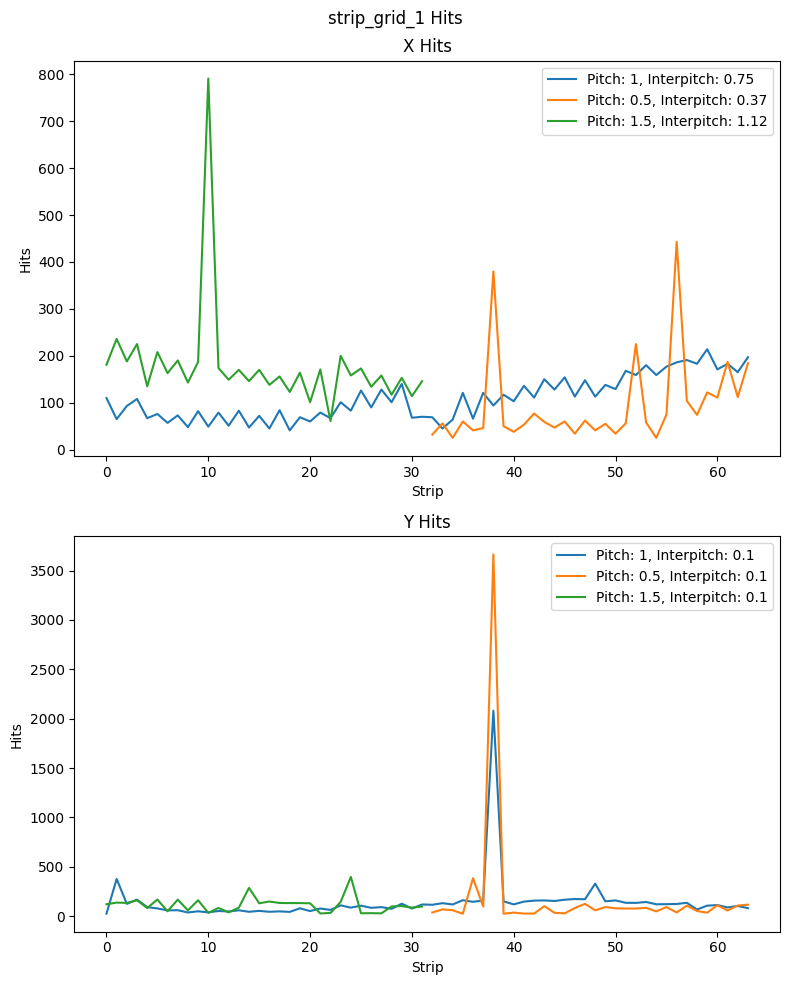

In [15]:
det.plot_hits_1d()

In [16]:
print(len(det.dream_data.hits))

9386


C:\Users\Dylan\PycharmProjects\saclay_micromegas\DreamData.py:618: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(num_connectors, 1, figsize=(10, 8), sharex=True)


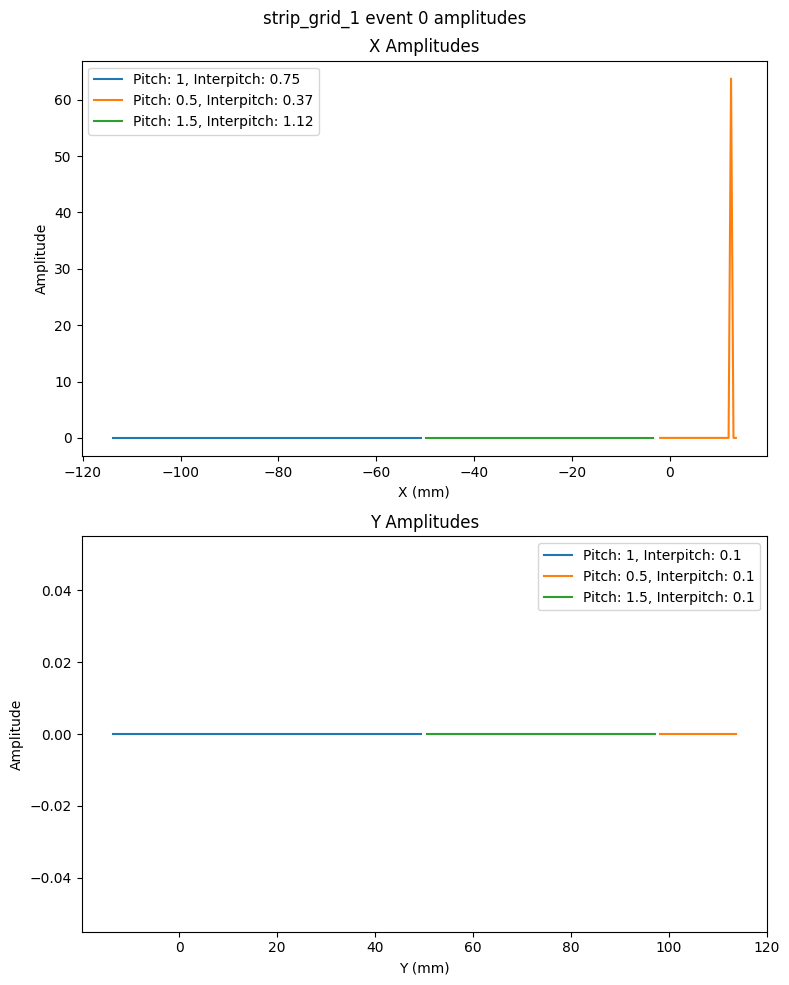

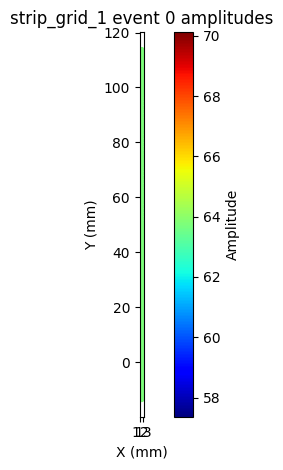

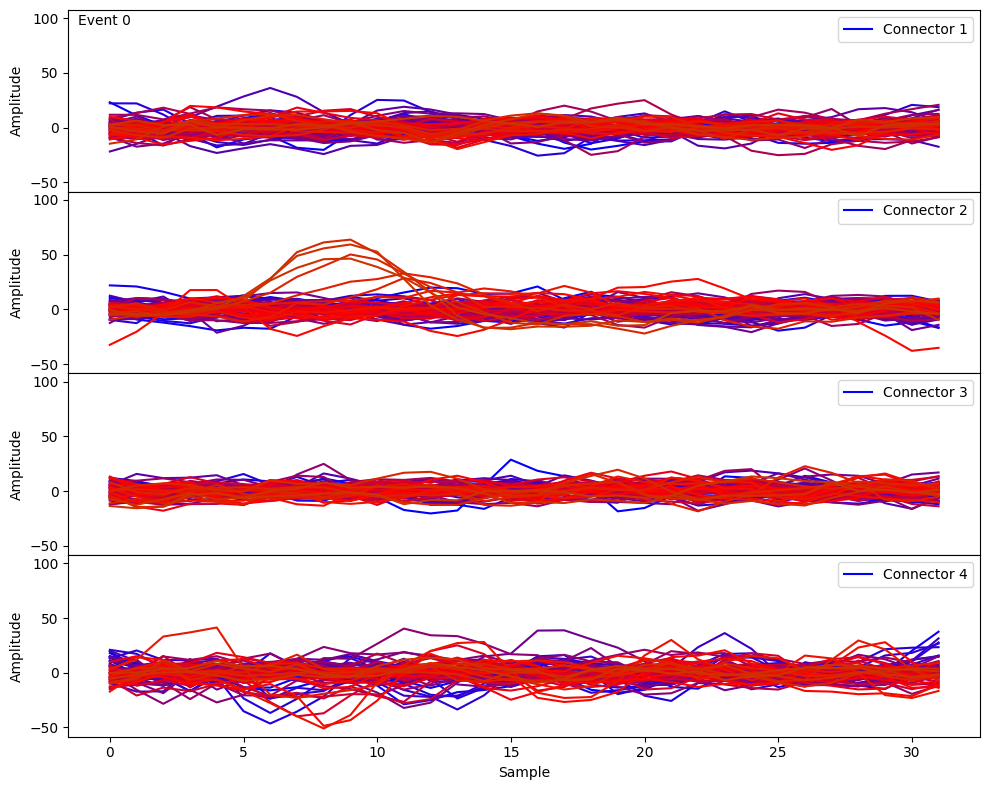

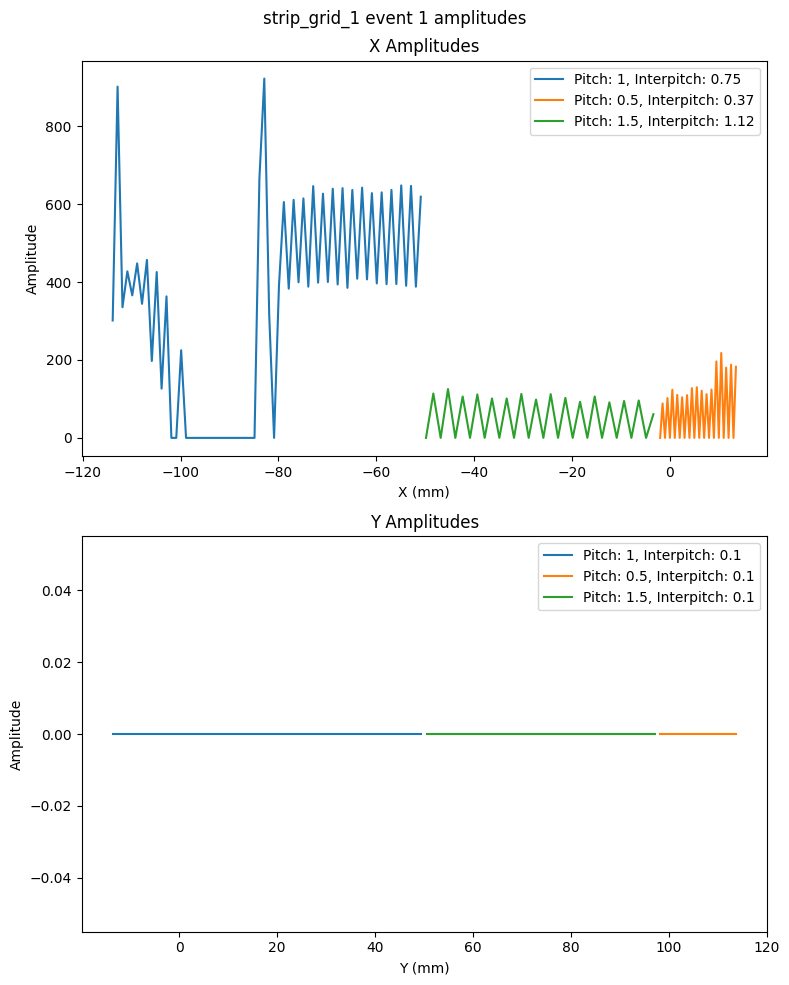

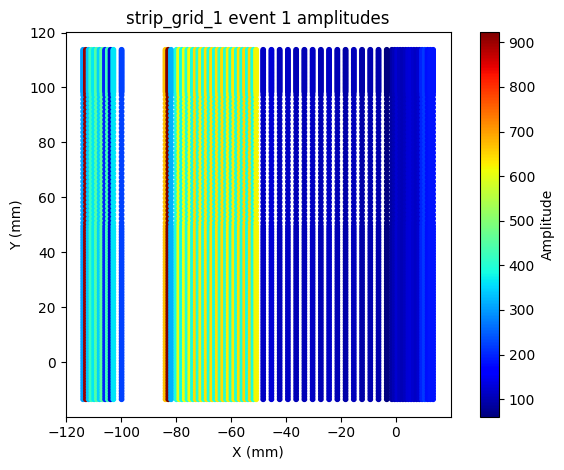

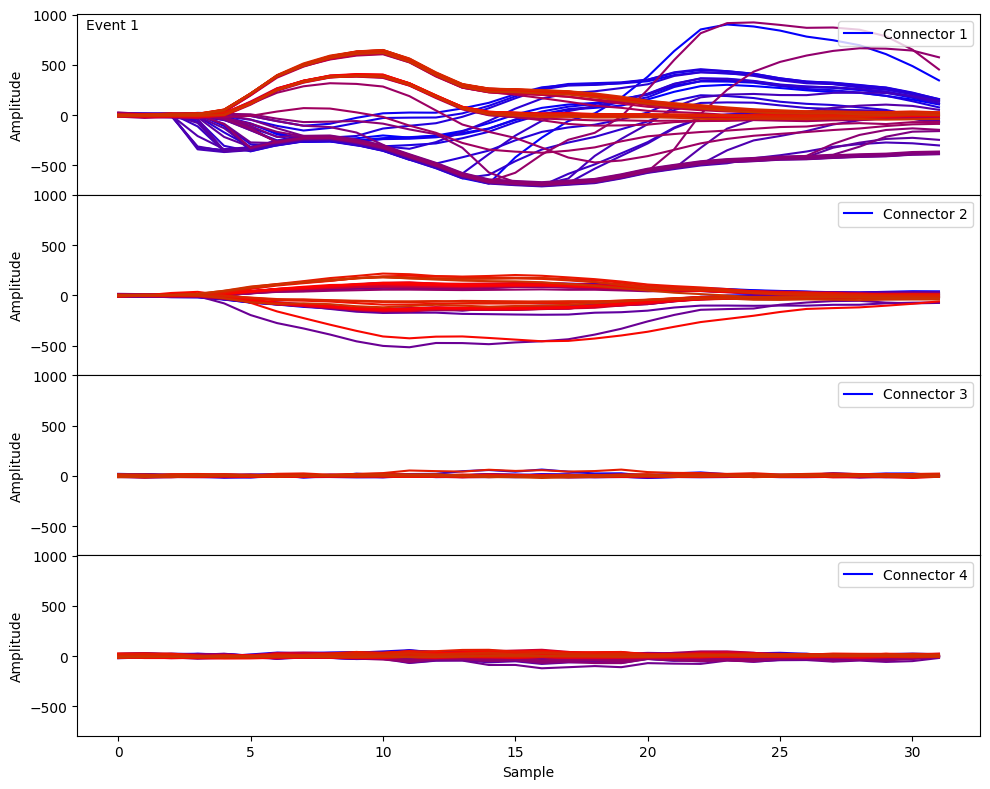

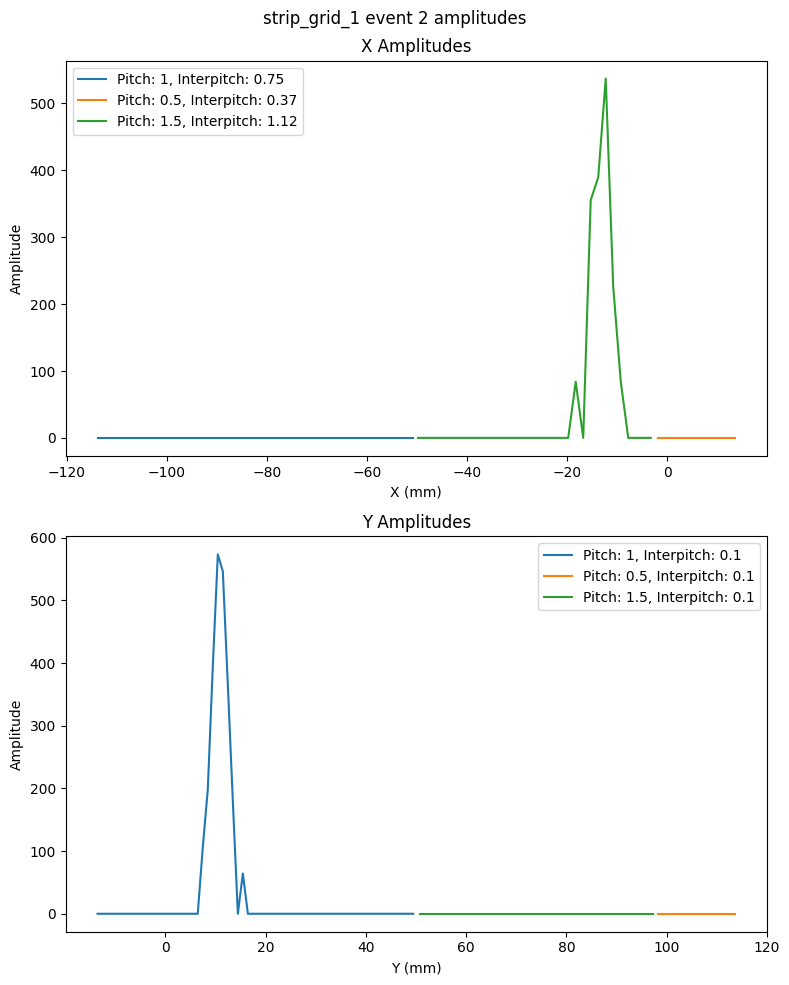

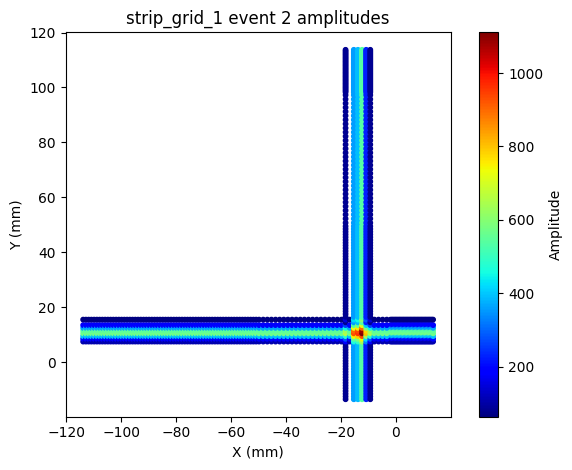

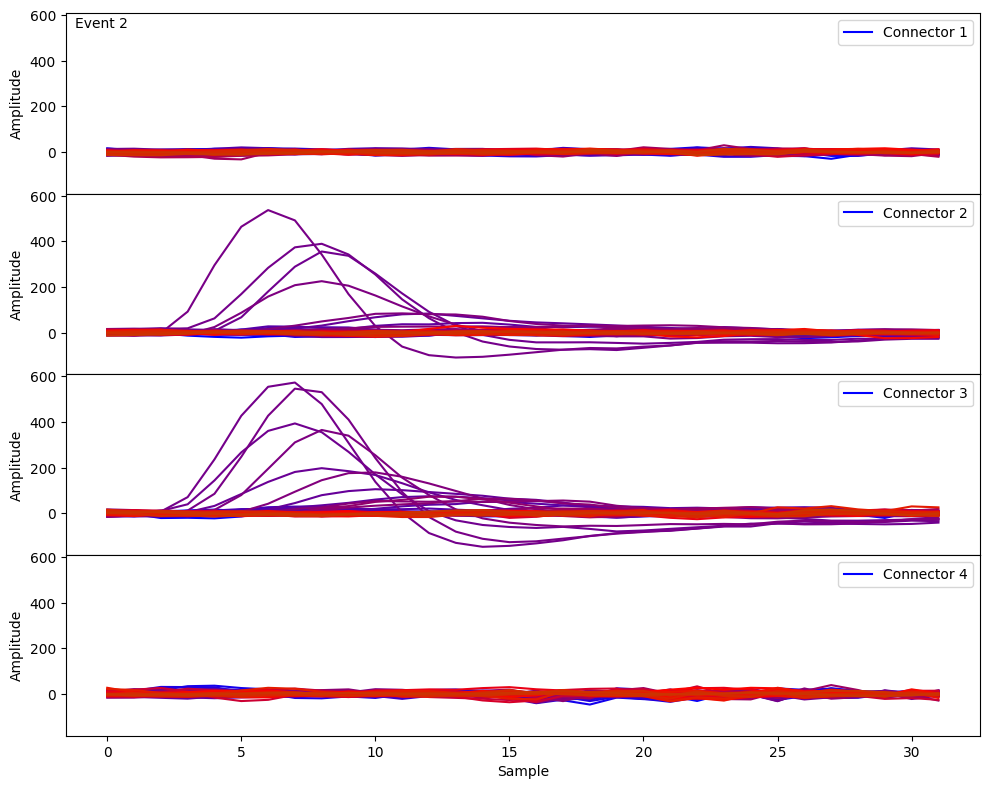

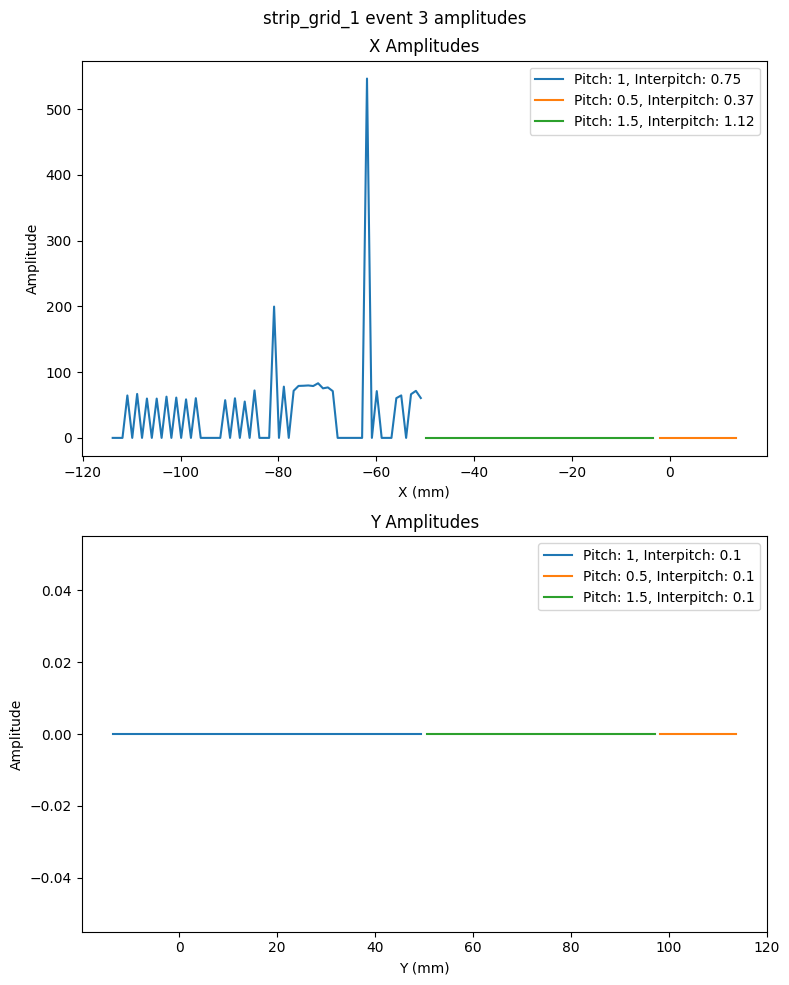

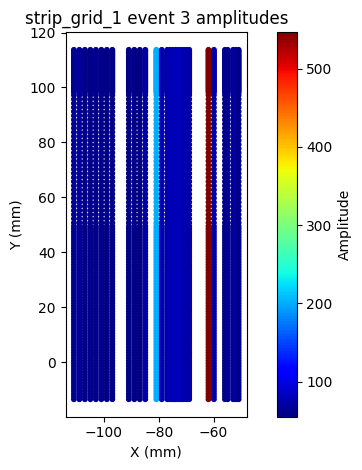

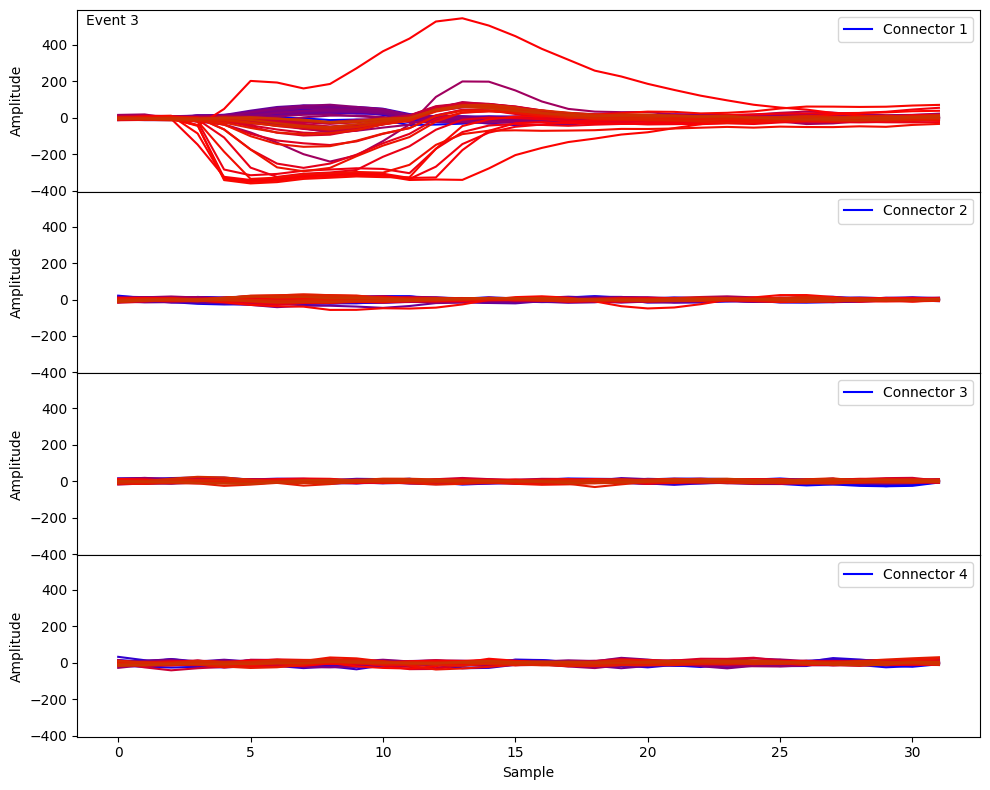

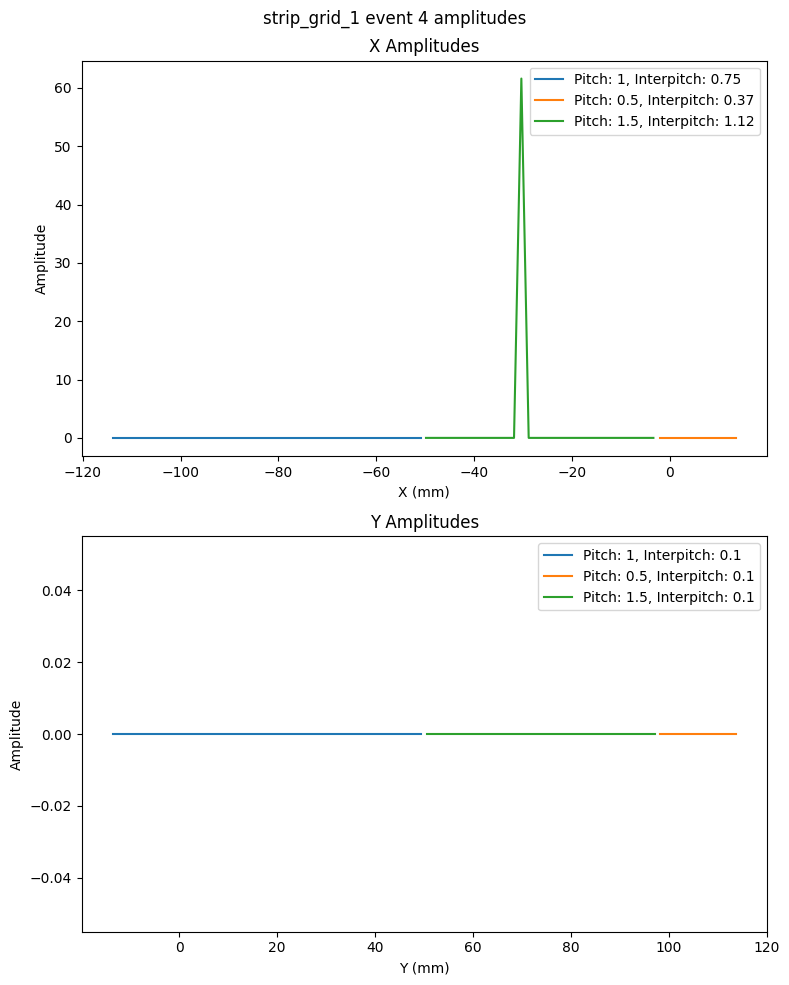

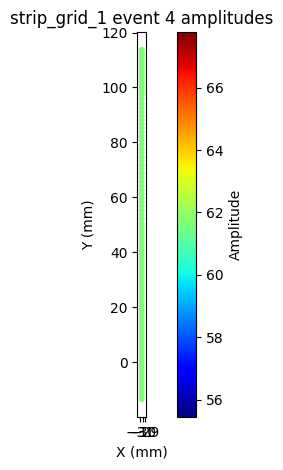

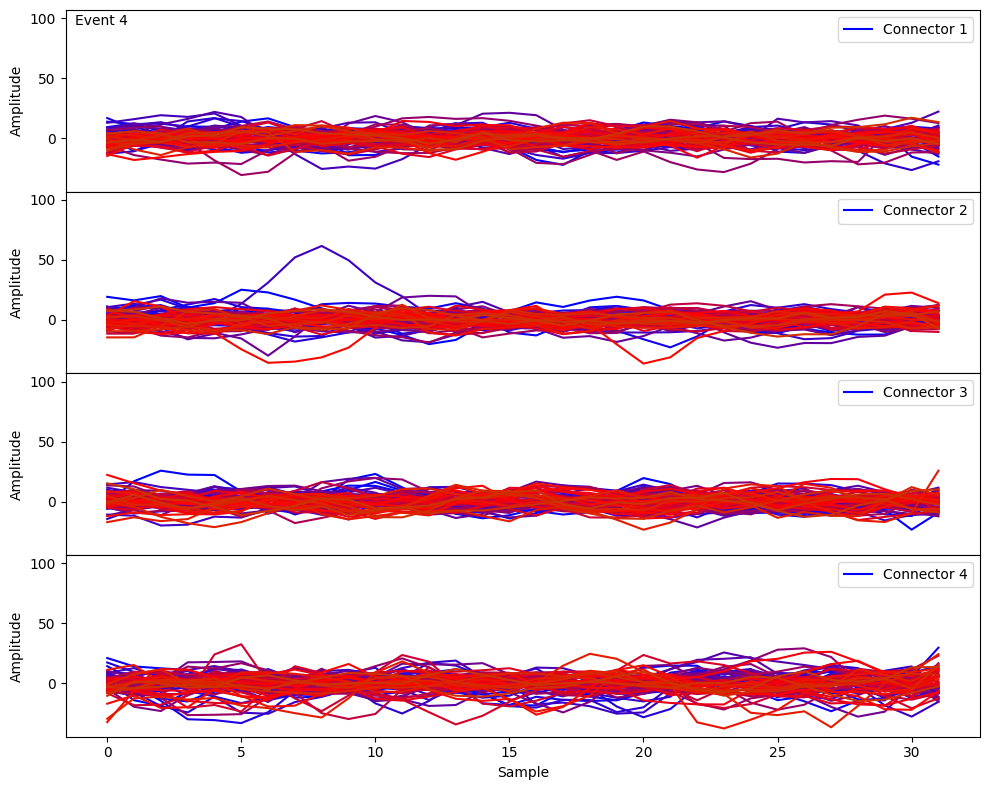

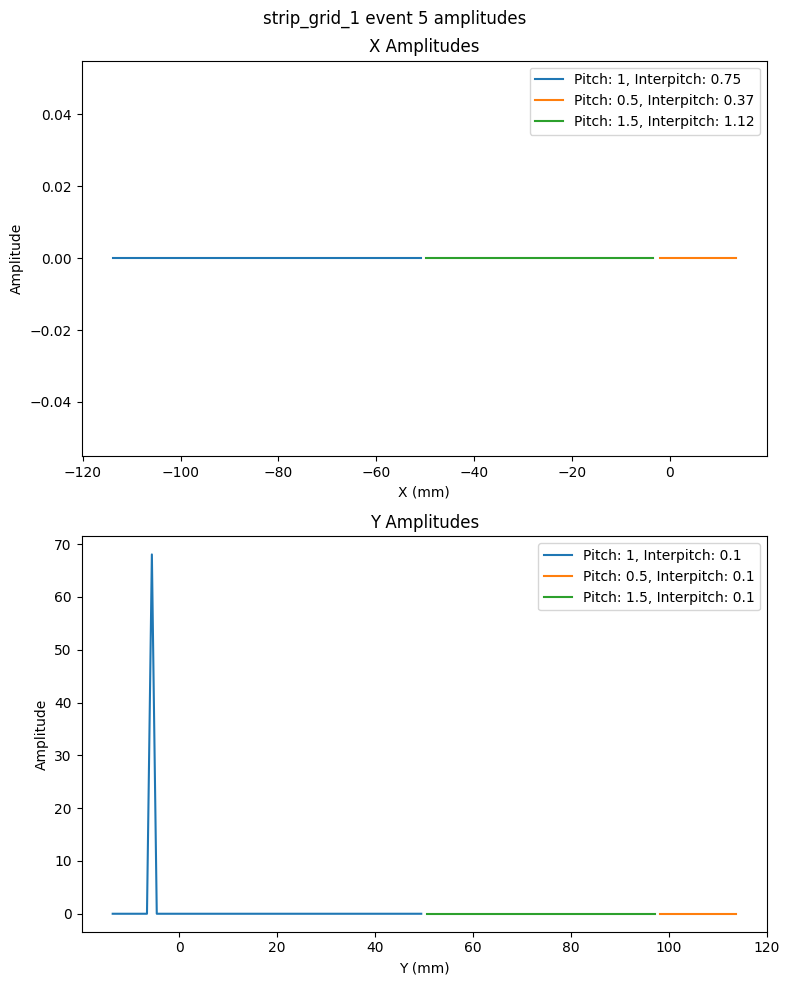

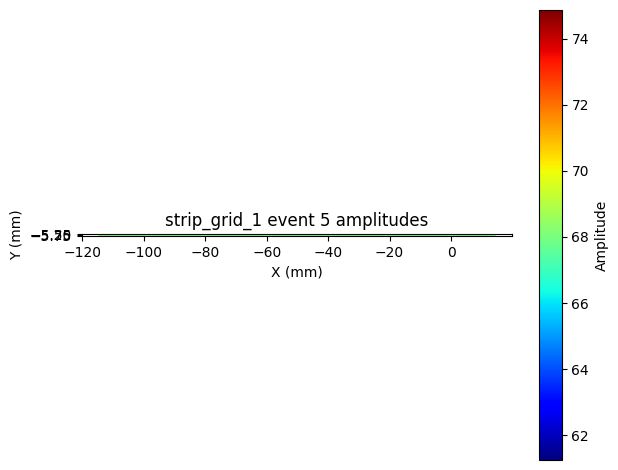

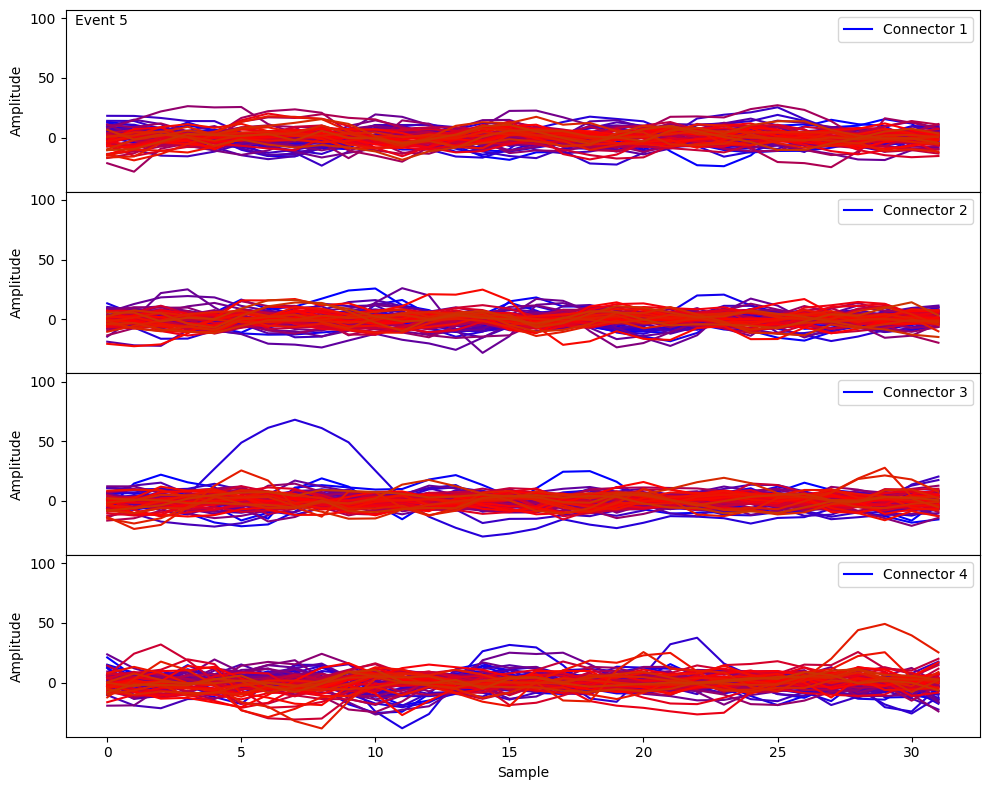

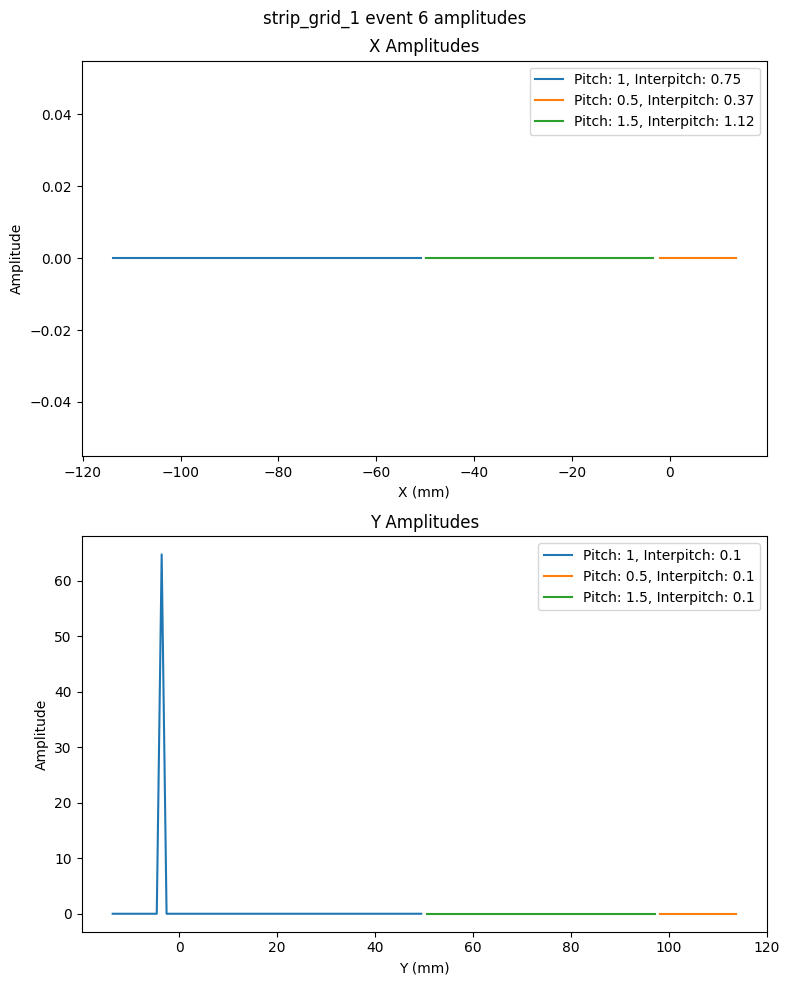

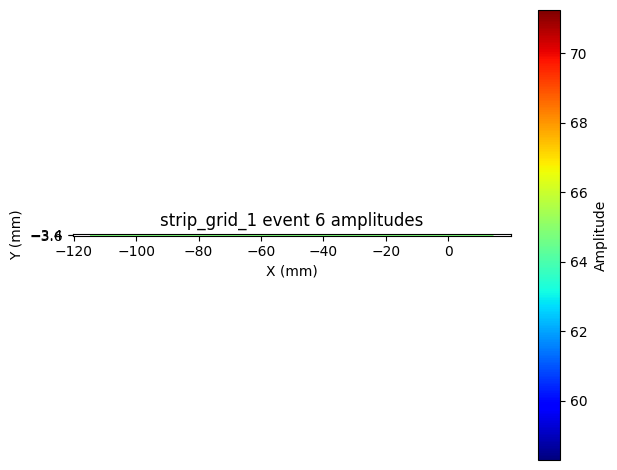

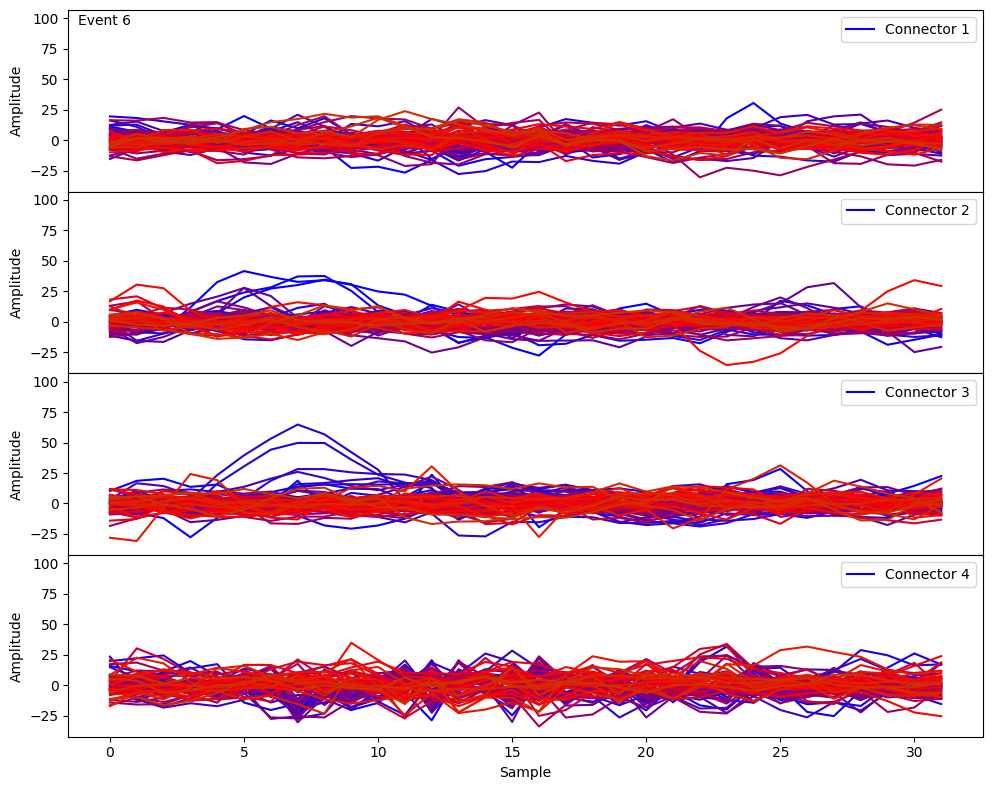

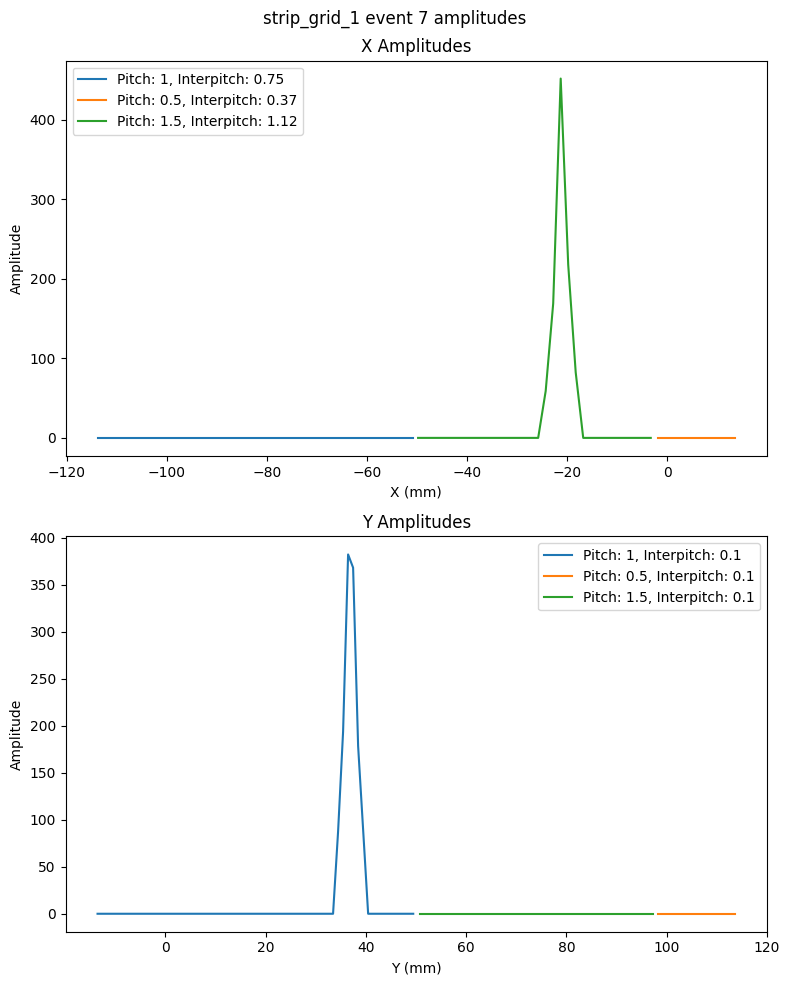

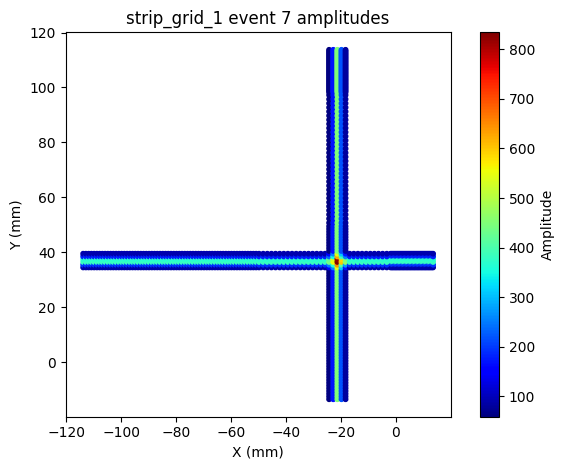

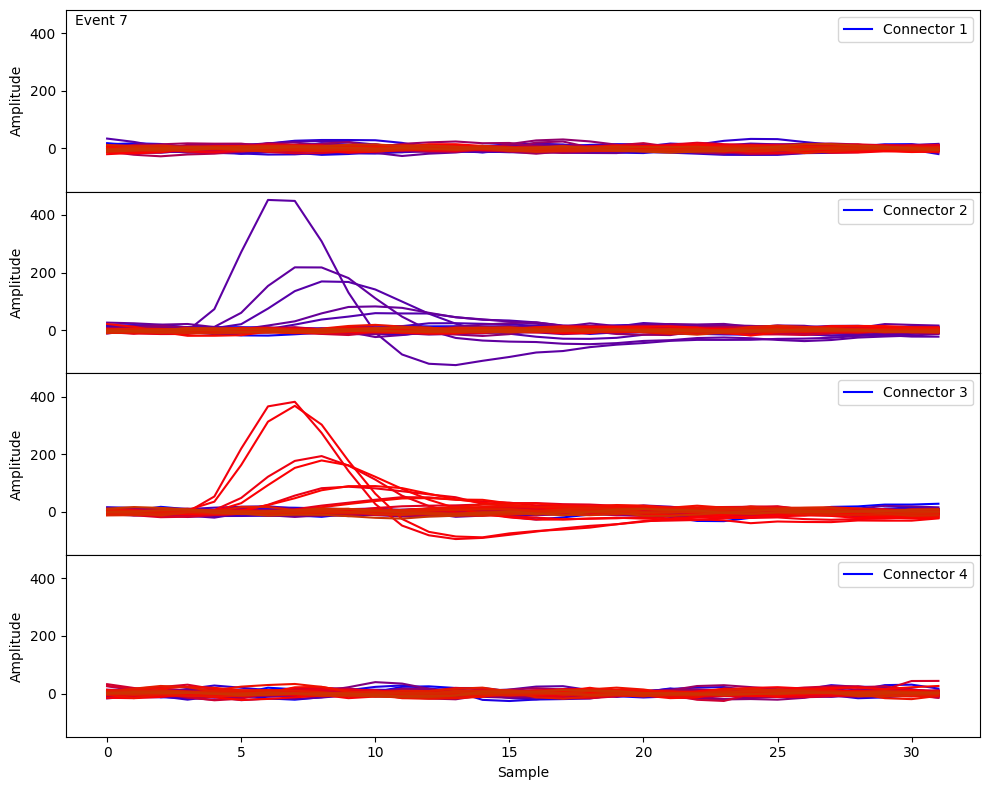

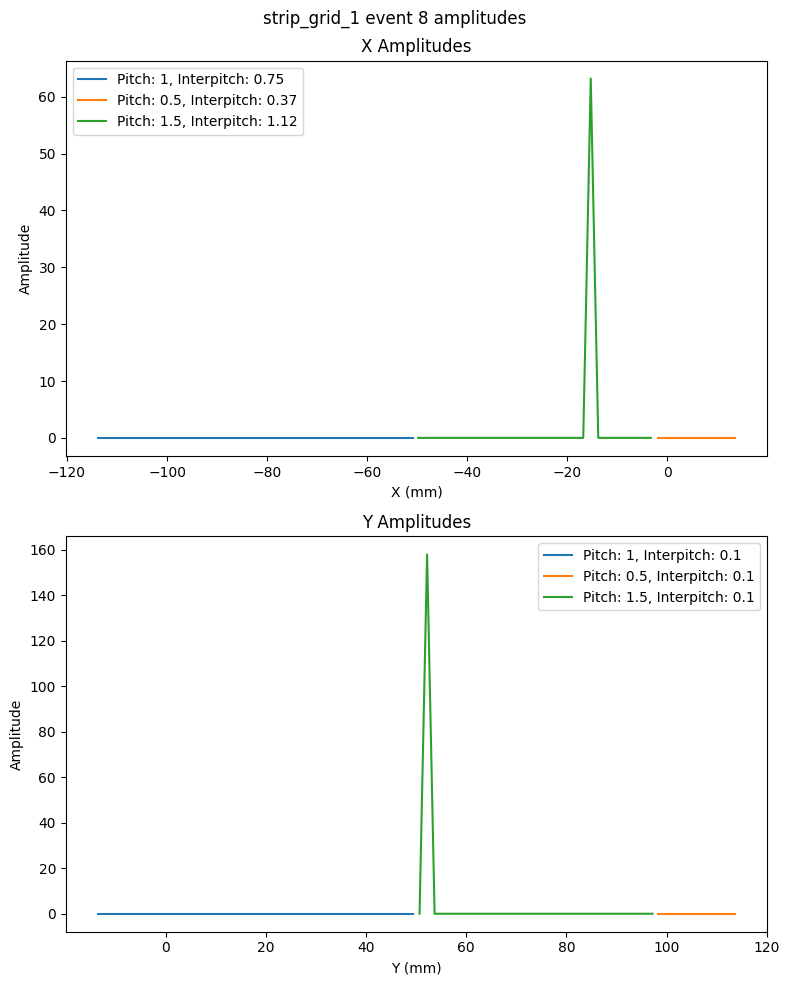

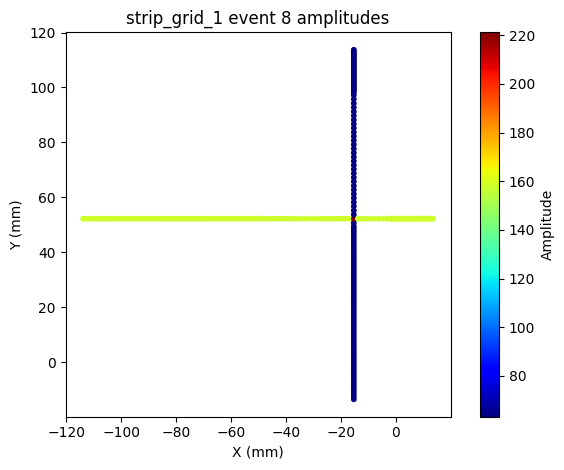

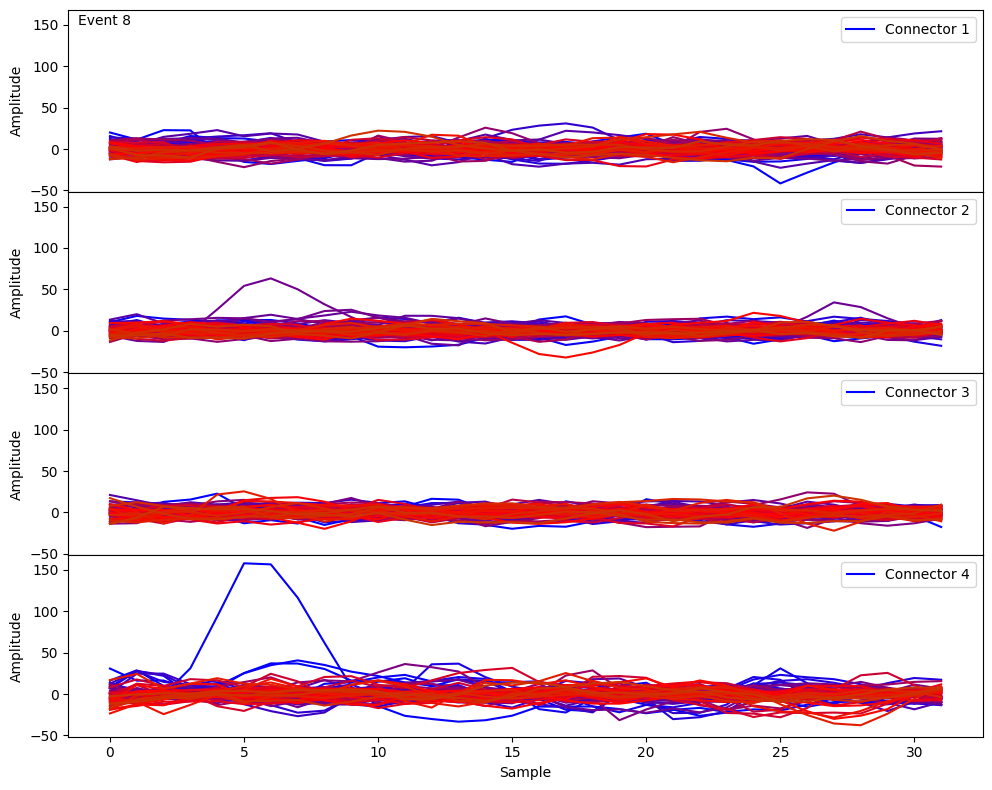

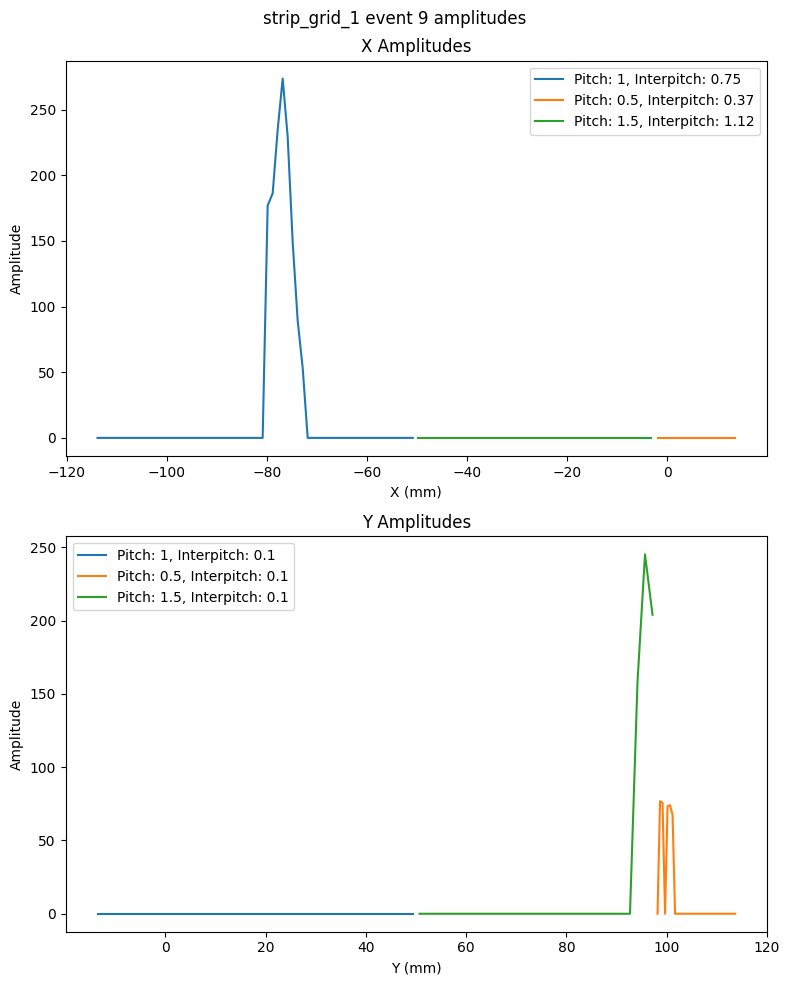

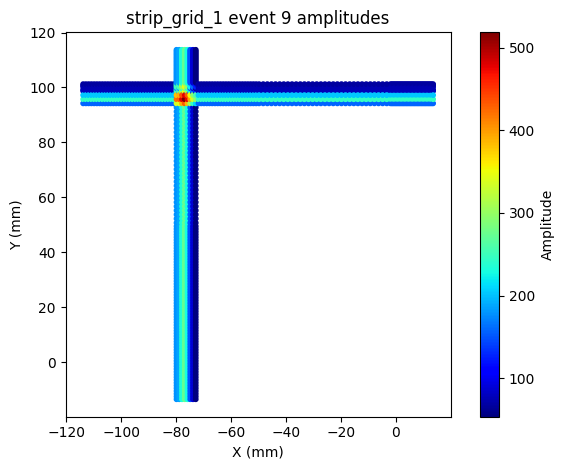

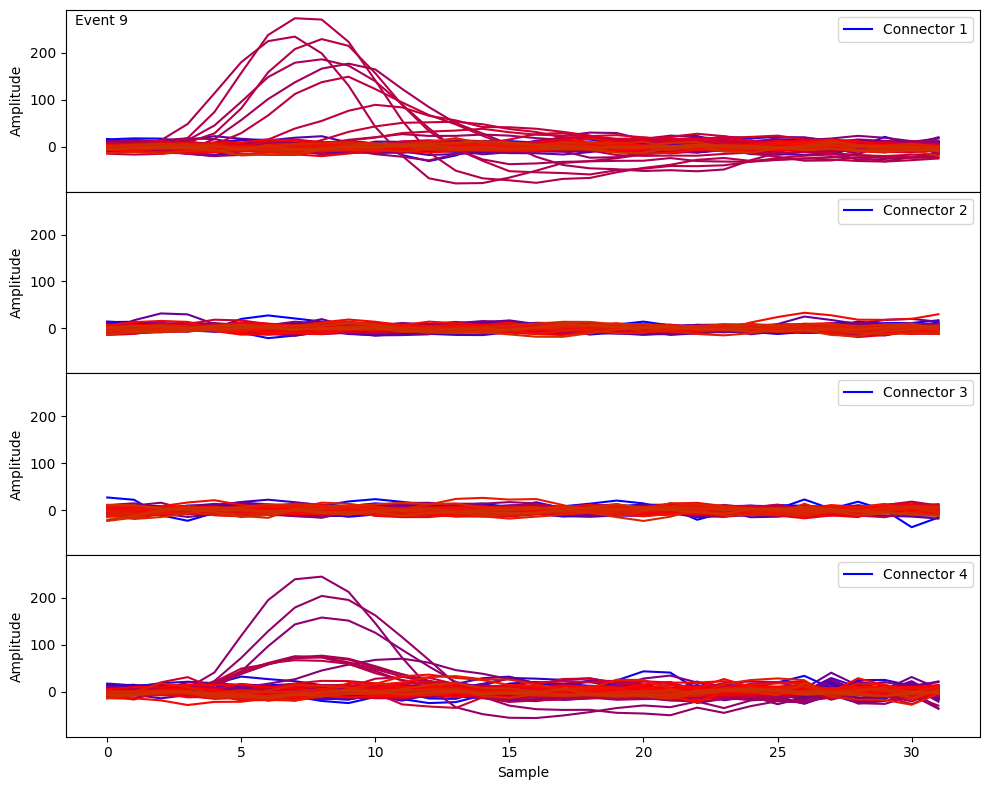

In [17]:
for event_num in range(min(len(det.dream_data.hits), 10)):
    det.plot_event_1d(event_num)
    det.plot_event_2d(event_num)
    det.dream_data.plot_waveforms(event_num)